In [1]:
# Loading external data - labels
import json

# NDJSON files

In [2]:
#Loading the images for operation 1
file1 = "Annotations_Operation1.ndjson"
ndjson_objects = []

with open(file1, 'r') as file:
    ndjson_content = file.read()
    
# Splitting the combined content into individual JSON objects and appending them to the list
ndjson_objects.extend(ndjson_content.strip().split('\n'))

In [3]:
#Randomly selecting 105 images for operation 1 for balancing the data 
import random
ndjson_objects = random.sample(ndjson_objects, 105)

In [5]:
# NDJSON file 2
file2 = "Annotations_Operation2.ndjson"
ndjson_objects2 = []
with open(file2, 'r') as file:
    ndjson_content = file.read()
    # Splitting the combined content into individual JSON objects and append them to the list
ndjson_objects2.extend(ndjson_content.strip().split('\n'))
#print(ndjson_objects2)

In [6]:
#Combining objects of operation1 and operation2 to get the final list 
ndjson_objects = ndjson_objects + ndjson_objects2
len(ndjson_objects)

210

# Loading images

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import requests
import numpy as np

In [8]:
#define the dimensions for resizing the images
width = 224
height = 224

#Lists to store images and annotations
X_train = []
y_train = []

In [9]:
# Downloading the annotated images from url Iterate through the ndjson_objects
for ndjson_object in ndjson_objects:
    data = json.loads(ndjson_object)
    
    if 'projects' in data and 'cln9q7zig12mq07zl5xpi6xf5' in data['projects']:
        # This structure matches the first file
        image_url = data['data_row']['row_data']
        annotations = data['projects']['cln9q7zig12mq07zl5xpi6xf5']['labels'][0]['annotations']

    else:
        # This structure matches the second file
        image_url = data['data_row']['row_data']
        annotations = data['projects']['clo0tm5gk04sl07zcbe3qhefn']['labels'][0]['annotations']

    
    #Download and preprocess the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((width, height))
    img = np.array(img)
    X_train.append(img)
    y_train.append(annotations)

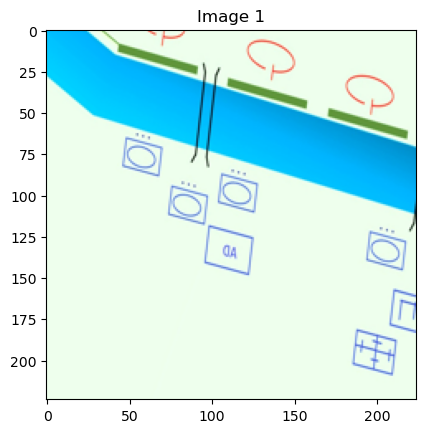

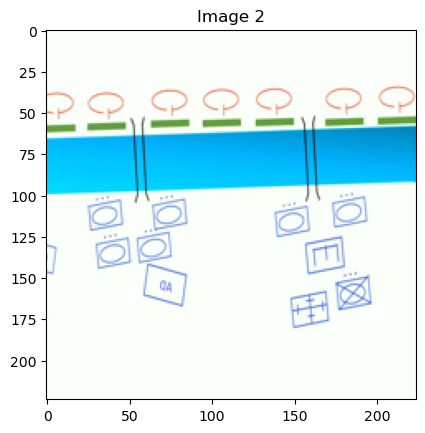

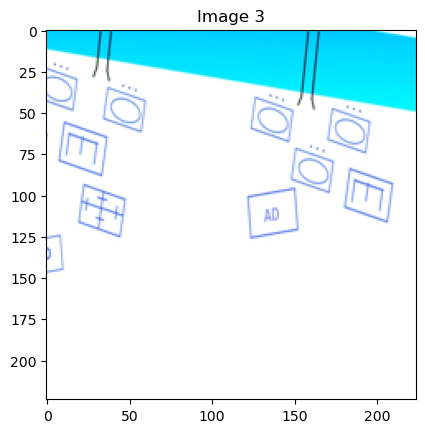

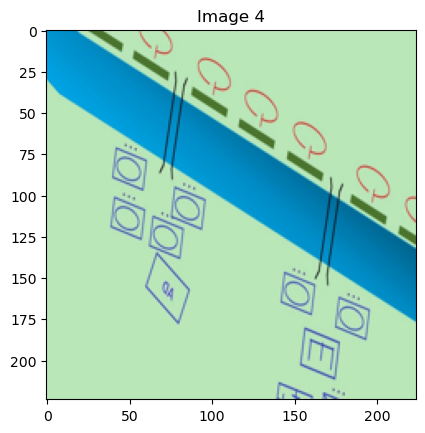

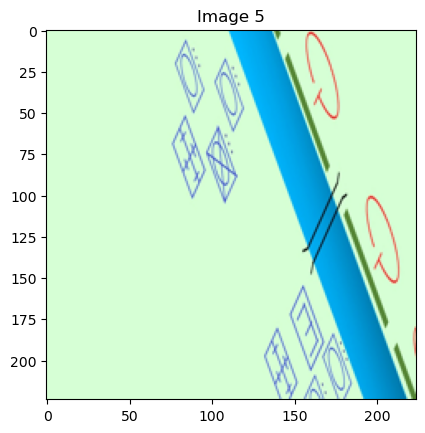

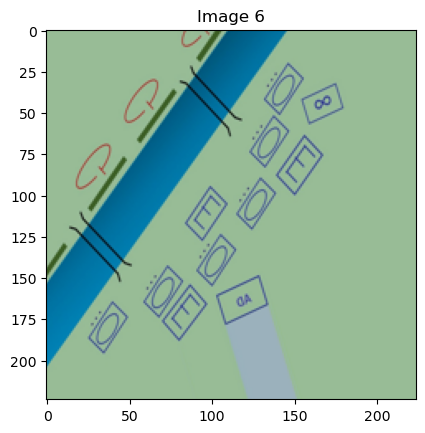

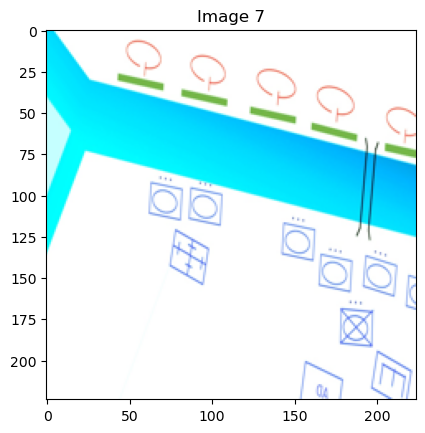

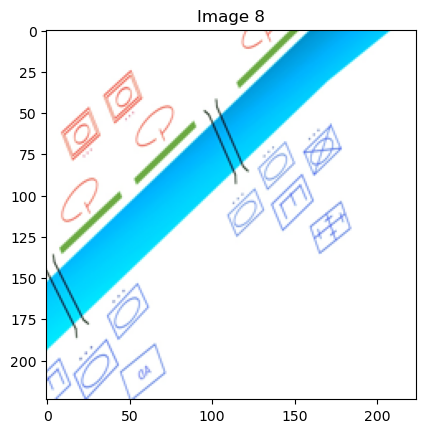

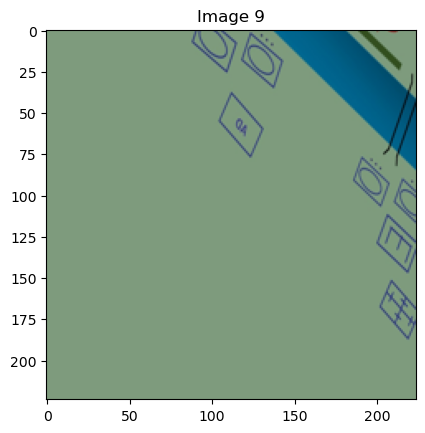

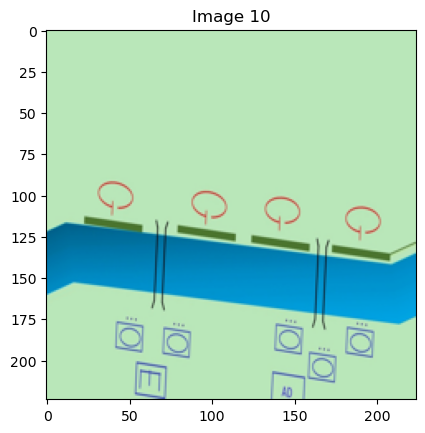

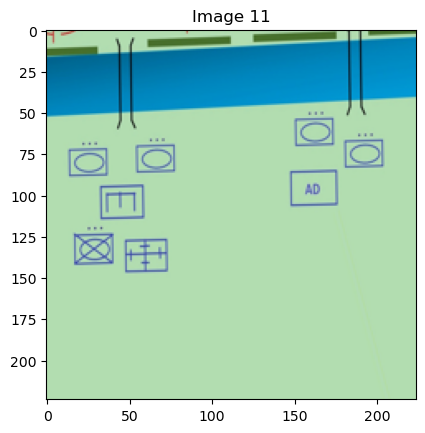

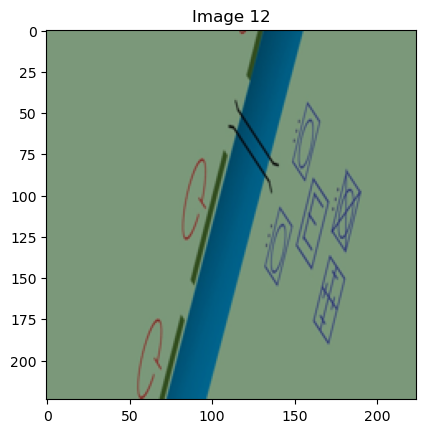

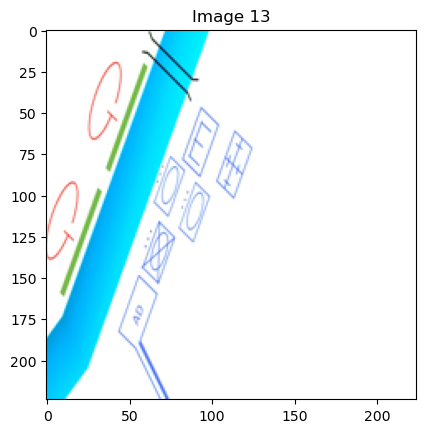

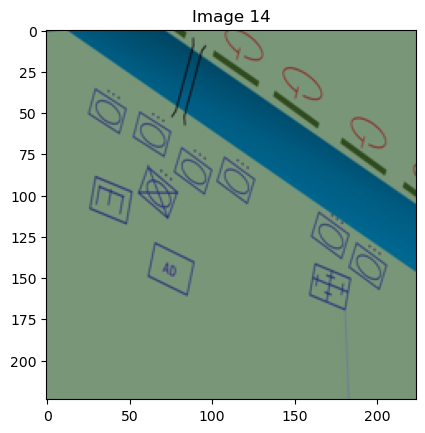

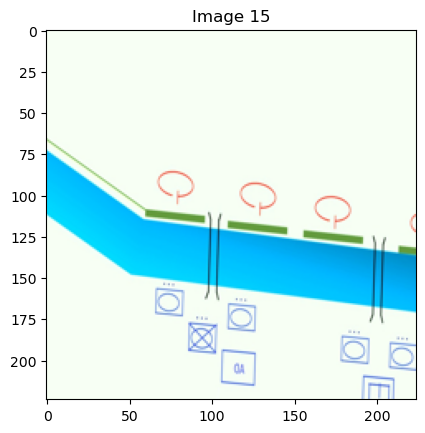

In [10]:
#Checking the downloads
num_images_to_display = 15

# Iterate through the first 15 images in X_train
for i in range(num_images_to_display):
    plt.figure()
    plt.imshow(X_train[i])  # Display the image
    plt.title(f"Image {i + 1}")  # Set a title for the image

plt.show() 

# Preprocessing 

### Image preprocessing

In [11]:
# Convert lists to NumPy arrays
X_train = np.array(X_train)

#Normalising the numpy array to the range [0, 1]
X_train = X_train / 255.0


In [12]:
print(X_train)

[[[[0.         0.74901961 0.99607843]
   [0.         0.74509804 1.        ]
   [0.         0.74117647 1.        ]
   ...
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]]

  [[0.         0.75294118 0.99607843]
   [0.         0.74901961 0.99607843]
   [0.         0.74509804 1.        ]
   ...
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]]

  [[0.00392157 0.76078431 1.        ]
   [0.         0.75294118 1.        ]
   [0.         0.74901961 0.99607843]
   ...
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]]

  ...

  [[0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   ...
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]
   [0.93333333 1.         0.92941176]]

  [[0.93333333 1.         0.92941176]
   [0.9

### Labels Preprocessing

In [13]:
# Normalizing training labels
classes = [label["name"] for annotation in y_train for label in annotation["objects"]]

#Removing duplicate class names for unique entity identification
classes = list(set(classes))
print(classes)

['Medical', 'Armored infantry company', 'Engineer', 'Enemy Armored Troop', 'Infantry company', 'Company headquarter', 'Minefields', 'Deployed enemy', 'Three parallel platoon', 'Armored troop', 'Air Unit', 'Air defence', 'Infantry batallian', 'Infantry platoon', 'Bridge', 'Mechanized Platoon', 'River', 'Batallian headquarter', 'Cross company', 'Three platoon company']


In [14]:
# Mapping from class names to integer labels
class_map = {class_name: idx for idx, class_name in enumerate(classes)}
class_map

{'Medical': 0,
 'Armored infantry company': 1,
 'Engineer': 2,
 'Enemy Armored Troop': 3,
 'Infantry company': 4,
 'Company headquarter': 5,
 'Minefields': 6,
 'Deployed enemy': 7,
 'Three parallel platoon': 8,
 'Armored troop': 9,
 'Air Unit': 10,
 'Air defence': 11,
 'Infantry batallian': 12,
 'Infantry platoon': 13,
 'Bridge': 14,
 'Mechanized Platoon': 15,
 'River': 16,
 'Batallian headquarter': 17,
 'Cross company': 18,
 'Three platoon company': 19}

In [15]:
# Converting class names in y_train to integer labels
y_train = [[class_map[label["name"]] for label in annotation["objects"]] for annotation in y_train]
y_train

[[16, 6, 7, 7, 7, 9, 9, 9, 11, 9, 2, 0, 14],
 [16, 7, 6, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 2, 0, 15, 11, 14, 14],
 [16, 9, 9, 9, 9, 9, 2, 2, 0, 10, 11, 14, 14],
 [16, 7, 7, 7, 7, 7, 7, 6, 9, 9, 9, 9, 11, 14, 14, 9, 9, 2, 0],
 [16, 6, 7, 7, 9, 9, 15, 0, 2, 9, 0, 9, 14],
 [16, 6, 7, 7, 7, 14, 14, 9, 9, 9, 9, 9, 9, 10, 2, 2, 11, 2],
 [16, 7, 7, 7, 7, 7, 6, 9, 9, 9, 9, 9, 9, 0, 15, 2, 11, 14],
 [16, 7, 7, 7, 6, 9, 9, 2, 11, 9, 9, 2, 0, 15, 14, 14, 3, 3],
 [16, 9, 9, 11, 9, 9, 2, 0, 14, 6],
 [16, 6, 7, 7, 7, 7, 9, 9, 9, 9, 9, 11, 2, 14, 14],
 [16, 6, 14, 9, 9, 2, 15, 0, 9, 9, 11, 14],
 [16, 14, 6, 7, 7, 9, 9, 2, 15, 0],
 [16, 14, 6, 7, 7, 2, 0, 9, 9, 15, 11],
 [16, 6, 7, 7, 7, 9, 9, 9, 9, 9, 9, 0, 11, 2, 15, 14],
 [16, 6, 7, 7, 7, 7, 14, 14, 9, 9, 9, 9, 15, 11, 2],
 [16, 6, 7, 7, 7, 9, 9, 0, 2, 15, 9, 9, 15, 14],
 [16, 6, 7, 7, 7, 7, 7, 9, 10, 2, 9, 9, 2, 11, 2, 9, 14, 14],
 [16, 6, 7, 7, 7, 9, 9, 9, 9, 15, 2, 11, 9, 9, 9, 2, 15, 14],
 [16, 6, 7, 7, 7, 7, 7, 9, 9, 9, 9, 2, 0, 15, 10, 14, 

In [16]:
# Removing duplicates from each list for unique entity identification
y_train= [list(set(labels)) for labels in y_train]
y_train

[[0, 2, 6, 7, 9, 11, 14, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 9, 10, 11, 14, 16],
 [0, 2, 6, 7, 9, 11, 14, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 10, 11, 14, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 3, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 9, 11, 14, 16],
 [2, 6, 7, 9, 11, 14, 16],
 [0, 2, 6, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 10, 11, 14, 16],
 [2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 10, 14, 15, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 14, 16],
 [0, 2, 6, 7, 9, 11, 14, 15, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [0, 2, 6, 7, 9, 10, 14, 15, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [0, 2, 3, 6, 7, 9, 14, 15, 16],
 [6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 11, 14, 16],
 [0, 2, 6, 7, 9, 14, 15, 16],
 [6, 7, 9, 14, 15, 16],
 [2, 6, 7, 9, 11, 14, 15, 

In [17]:
# Find the maximum length among the lists
max_length = len(class_map)
print(max_length)

20


In [18]:
# Pad the lists with -1 to make them uniform
y_train = [labels + [-1] * (max_length - len(labels)) for labels in y_train]
y_train

[[0, 2, 6, 7, 9, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 11, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 9, 10, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [2, 6, 7, 9, 10, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 11, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 3, 6, 7, 9, 11, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 9, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [2, 6, 7, 9, 11, 14, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 9, 11, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 2, 6, 7, 9, 11, 14, 15, 16, -1, -1, -1, -1, -1, -1, -1

# Splitting train data into train and validation data 

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

#Coverting y_train and y_val to numpy array for matching with X_train and X_val
y_train = np.array(y_train)
y_val = np.array(y_val)

# Assuming X_train and y_train are NumPy arrays
print("X_train data type:", X_train.dtype)
print("X_train shape:", X_train.shape)

print("y_train data type:", y_train.dtype)
print("y_train shape:", y_train.shape)

# Assuming X_val and y_val are NumPy arrays
print("X_val data type:", X_val.dtype)
print("X_val shape:", X_val.shape)

print("y_val data type:", y_val.dtype)
print("y_val shape:", y_val.shape)

X_train data type: float64
X_train shape: (178, 224, 224, 3)
y_train data type: int32
y_train shape: (178, 20)
X_val data type: float64
X_val shape: (32, 224, 224, 3)
y_val data type: int32
y_val shape: (32, 20)


In [20]:
#Coverting y_train and y_val to numpy array for matching with X_train and X_val respectively
y_train = np.array(y_train)

In [21]:
y_val = np.array(y_val)

# The CNN model

In [22]:
from tensorflow import keras
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

In [23]:
num_channels = 3
num_classes = len(class_map)

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, num_channels)))

In [26]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [27]:
model.add(Flatten()) 
model.add(Dense(num_classes, activation='sigmoid')) # Output layer

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: -2395.3076 - accuracy: 0.0730 - val_loss: -10157.1660 - val_accuracy: 0.0938
Epoch 2/10
6/6 [==============================] - 19s 3s/step - loss: -22669.1621 - accuracy: 0.0506 - val_loss: -54827.3633 - val_accuracy: 0.0938
Epoch 3/10
6/6 [==============================] - 15s 3s/step - loss: -91726.9453 - accuracy: 0.0506 - val_loss: -181556.5938 - val_accuracy: 0.0938
Epoch 4/10
6/6 [==============================] - 15s 2s/step - loss: -277612.2500 - accuracy: 0.0506 - val_loss: -473318.0312 - val_accuracy: 0.0938
Epoch 5/10
6/6 [==============================] - 23s 4s/step - loss: -664566.1875 - accuracy: 0.0506 - val_loss: -1060195.3750 - val_accuracy: 0.0938
Epoch 6/10
6/6 [==============================] - 22s 3s/step - loss: -1414284.3750 - accuracy: 0.0506 - val_loss: -2123206.0000 - val_accuracy: 0.0938
Epoch 7/10
6/6 [==============================] - 20s 3s/step - loss: -2716876.2500 - accuracy: 0.0506 

In [30]:
train_accuracy = history.history['accuracy'][-1] 
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.05056179687380791
Validation Accuracy: 0.09375


In [31]:
# Preprocess the unseen image (X_unseen)
image_path = "IntentRecog_Dataset/test/Operation 1/augmented_0_Slide12.JPG"  # Load the unseen image
unseen_image = Image.open(image_path)
unseen_image = unseen_image.resize((224, 224))
img = np.array(unseen_image)
img = img.reshape((1, 224, 224, 3))
img = img / 255.0

In [32]:
predictions = model.predict(img)
#print(predictions)

1/1 [==============================] - 0s 248ms/step


In [33]:
interpreted = []
threshold = 0.5  # Adjust the threshold as needed

for prediction_set in predictions:
    predicted_classes = [class_label for class_label, score in class_map.items() if prediction_set[class_map[class_label]] > threshold]
    interpreted.append(predicted_classes)
# interpreted_predictions now contains a list of lists, where each list represents the predicted classes for each image
print(interpreted)

[['Medical', 'Armored infantry company', 'Engineer', 'Enemy Armored Troop', 'Infantry company', 'Company headquarter', 'Minefields', 'Deployed enemy', 'Three parallel platoon']]


In [34]:
# Defining scores for each entity based on significance/importance
operation1_labels = { 
    'River' : 1, 
    'Deployed enemy' : 1, 
    'Minefields' : 1, 
    'Armored troop' : 2, 
    'Mechanized Platoon' : 1, 
    'Enemy Armored Troop' : 1, 
    'Bridge' : 2,
    'Engineer' : 2, 
    'Air Unit' : 1, 
    'Air defence' : 1, 
    'Medical' :1
}

operation2_labels = {
    'Cross company': 1, 
    'Infantry platoon': 1, 
    'Company headquarter': 1, 
    'Minefields': 1, 
    'Three platoon company': 1, 
    'Plus company' :1, 
    'Infantry company':2, 
    'Batallian headquarter':1, 
    'Three parallel platoon':1, 
    'Armored infantry company':1, 
    'Infantry batallian':2
}

In [35]:
predict = interpreted[0]
print(predict)

['Medical', 'Armored infantry company', 'Engineer', 'Enemy Armored Troop', 'Infantry company', 'Company headquarter', 'Minefields', 'Deployed enemy', 'Three parallel platoon']


In [36]:
# Calculate the total scores for each operation
total_score_operation1 = sum(operation1_labels.get(label, 0) for label in predict)
total_score_operation2 = sum(operation2_labels.get(label, 0) for label in predict)
print(total_score_operation1)
print(total_score_operation2)

6
6


In [37]:
# Make predictions based on the total scores
if total_score_operation1 > total_score_operation2:
    prediction = "Operation 1"
elif total_score_operation2 > total_score_operation1:
    prediction = "Operation 2"
else:
    prediction = "Cannot make prediction"
    
# Output the prediction
print("Prediction:", prediction)

Prediction: Cannot make prediction


In [38]:
# Preprocess the unseen image (X_unseen)
image_path = "IntentRecog_Dataset/test/Operation 2/augmented_5_Slide2.JPG"  # Load the unseen image
unseen_image = Image.open(image_path)
unseen_image = unseen_image.resize((224, 224))
img = np.array(unseen_image)
img = img.reshape((1, 224, 224, 3))
img = img / 255.0

interpreted_predictions1 = []

for prediction_set in predictions:
    predicted_classes = [class_label for class_label, score in class_map.items()]
    interpreted_predictions1.append(predicted_classes)

print(interpreted_predictions1)

[['Medical', 'Armored infantry company', 'Engineer', 'Enemy Armored Troop', 'Infantry company', 'Company headquarter', 'Minefields', 'Deployed enemy', 'Three parallel platoon', 'Armored troop', 'Air Unit', 'Air defence', 'Infantry batallian', 'Infantry platoon', 'Bridge', 'Mechanized Platoon', 'River', 'Batallian headquarter', 'Cross company', 'Three platoon company']]


In [39]:
predict = interpreted_predictions1[0]
print(predict)

['Medical', 'Armored infantry company', 'Engineer', 'Enemy Armored Troop', 'Infantry company', 'Company headquarter', 'Minefields', 'Deployed enemy', 'Three parallel platoon', 'Armored troop', 'Air Unit', 'Air defence', 'Infantry batallian', 'Infantry platoon', 'Bridge', 'Mechanized Platoon', 'River', 'Batallian headquarter', 'Cross company', 'Three platoon company']


In [40]:
# Calculate the total scores for each operation
total_score_operation1 = sum(operation1_labels.get(label, 0) for label in predict)
total_score_operation2 = sum(operation2_labels.get(label, 0) for label in predict)
print(total_score_operation1)
print(total_score_operation2)

14
12


In [41]:
# Make predictions based on the total scores
if total_score_operation1 > total_score_operation2:
    prediction = "Operation 1"
elif total_score_operation2 > total_score_operation1:
    prediction = "Operation 2"
else:
    prediction = "Cannot make prediction"
    
# Output the prediction
print("Prediction:", prediction)

Prediction: Operation 1
